# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         response = requests.get(city_url)
        # Parse the JSON and retrieve data
         city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
         city_lat = city_weather["coord"]["lat"]
         city_lng = city_weather["coord"]["lon"]
         city_max_temp = city_weather["main"]["temp_max"]
         city_humidity = city_weather["main"]["humidity"]
         city_clouds = city_weather["clouds"]["all"]
         city_wind = city_weather["wind"]["speed"]
         city_country = city_weather["sys"]["country"]
         city_date = city_weather["dt"]

        # Append the City information into city_data list
         city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nadi
Processing Record 2 of Set 1 | lionel town
Processing Record 3 of Set 1 | taoudenni
Processing Record 4 of Set 1 | sikasso
Processing Record 5 of Set 1 | treinta y tres
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | guiyang
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | kittila
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | bardai
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | fort william
Processing Record 18 of Set 1 | si sa ket
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | nemuro
Processing Record 21 of Set 1 | wladyslawowo
Processing Record 22 of Set 1 | labytnangi
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nadi,-17.8000,177.4167,301.15,69,40,4.63,FJ,1686619172
1,lionel town,17.8101,-77.2406,302.09,82,6,4.25,JM,1686619172
2,taoudenni,22.6783,-3.9836,307.60,10,51,3.77,ML,1686619172
3,sikasso,10.9167,-7.0000,297.93,80,13,1.97,ML,1686619172
4,treinta y tres,-33.2333,-54.3833,277.64,81,7,2.69,UY,1686619172


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nadi,-17.8000,177.4167,301.15,69,40,4.63,FJ,1686619172
1,lionel town,17.8101,-77.2406,302.09,82,6,4.25,JM,1686619172
2,taoudenni,22.6783,-3.9836,307.60,10,51,3.77,ML,1686619172
3,sikasso,10.9167,-7.0000,297.93,80,13,1.97,ML,1686619172
4,treinta y tres,-33.2333,-54.3833,277.64,81,7,2.69,UY,1686619172


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

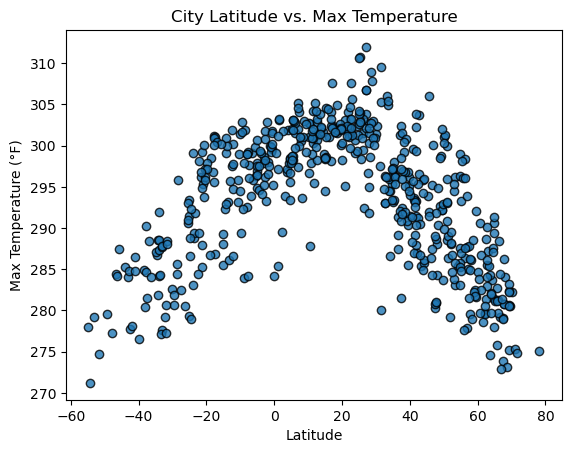

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.8)
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

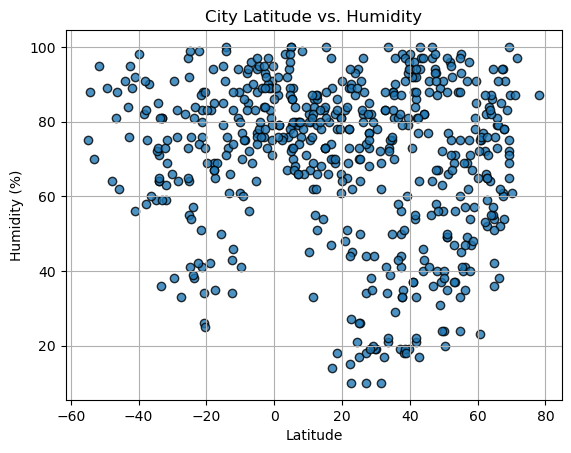

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

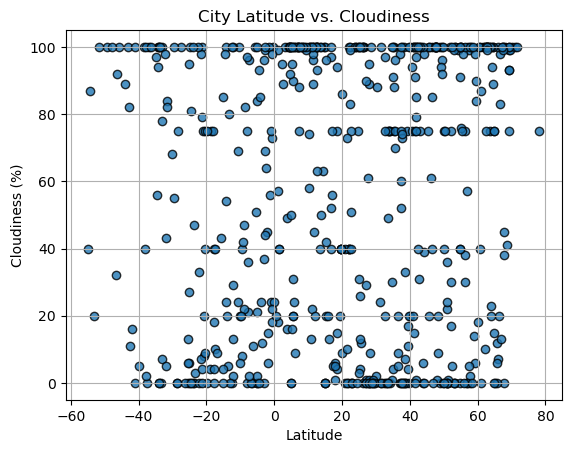

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

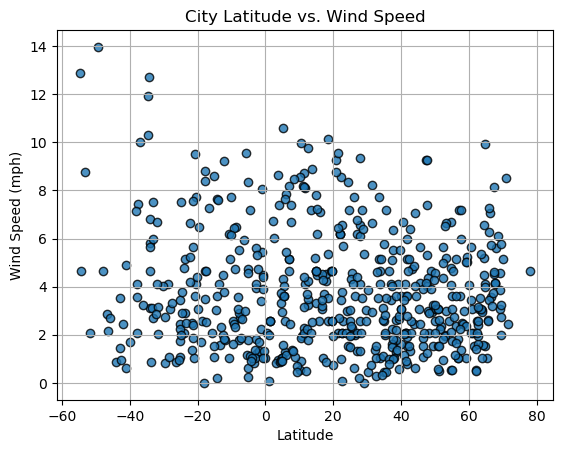

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, output_filename):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Save the figure
    plt.savefig(output_filename)

    # Show the plot
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lionel town,17.8101,-77.2406,302.09,82,6,4.25,JM,1686619172
2,taoudenni,22.6783,-3.9836,307.60,10,51,3.77,ML,1686619172
3,sikasso,10.9167,-7.0000,297.93,80,13,1.97,ML,1686619172
6,bethel,41.3712,-73.4140,293.62,88,100,3.60,US,1686618753
8,guiyang,26.5833,106.7167,292.42,88,100,2.00,CN,1686619173


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nadi,-17.8000,177.4167,301.15,69,40,4.63,FJ,1686619172
4,treinta y tres,-33.2333,-54.3833,277.64,81,7,2.69,UY,1686619172
5,hermanus,-34.4187,19.2345,288.60,85,100,12.70,ZA,1686618760
7,adamstown,-25.0660,-130.1015,293.44,64,27,3.44,PN,1686618745
11,margaret river,-33.9500,115.0667,288.57,71,100,6.83,AU,1686618767


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5657220150583224


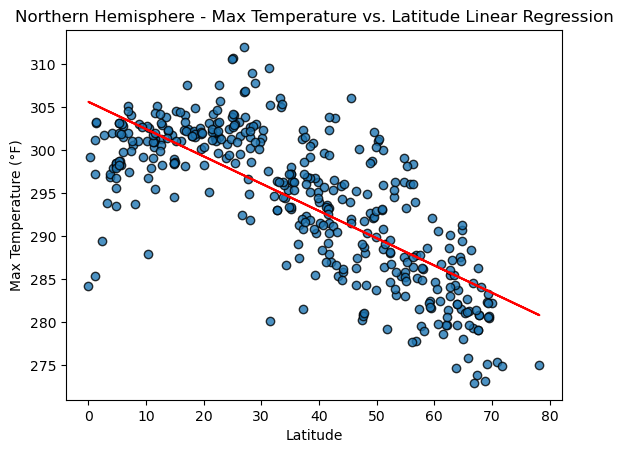

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (°F)"
title = "Northern Hemisphere - Max Temperature vs. Latitude Linear Regression"

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set the title and labels
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show the plot
plt.show()

The r-squared is: 0.6052641170851327


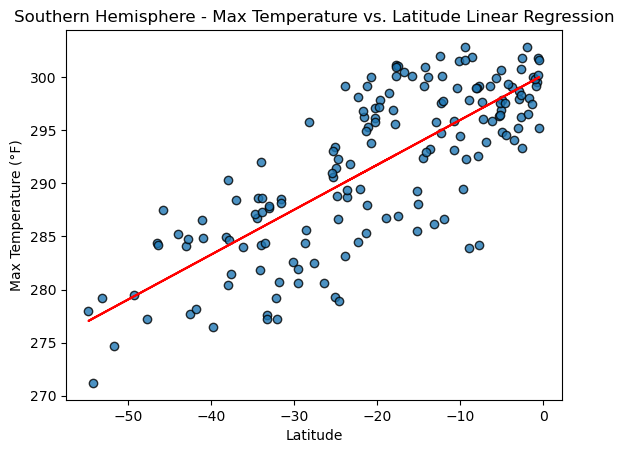

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (°F)"
title = "Southern Hemisphere - Max Temperature vs. Latitude Linear Regression"

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set the title and labels
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** In the southern hemisphere as the latitude reaches 0 (closer to the equator), the maximum temperature increases. In the northern hemisphere, we can see a negative correlation, as the latitude increases (moves further from the equator) the maximum temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.011115176105944617


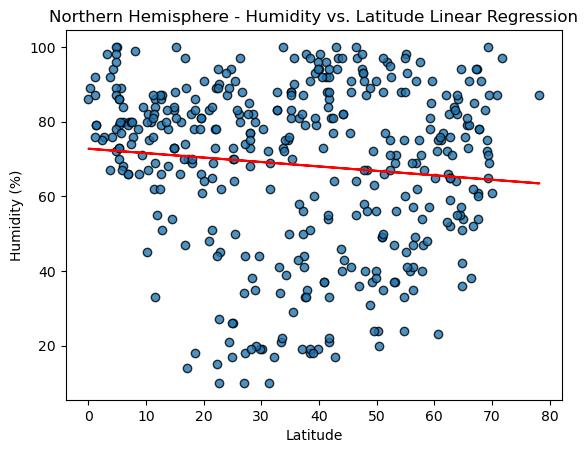

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
title = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set the title and labels
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show the plot
plt.show()

The r-squared is: 0.015953673773392574


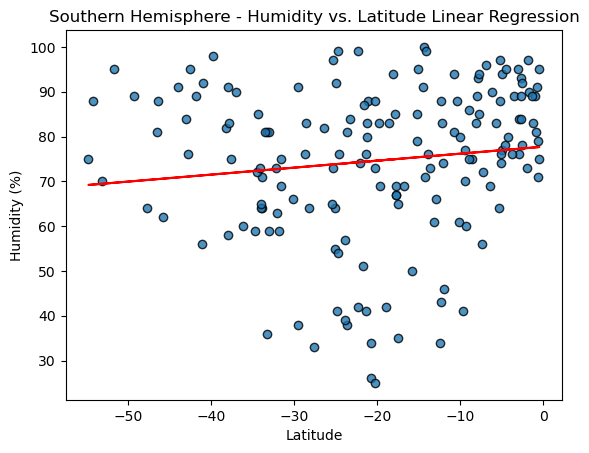

In [24]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
title = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set the title and labels
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** For the southern hemisphere, we can see the regression line has a positive slope. This shows a positive correlation between latitude and humidity. As it moves closer to the equator, humidity increases. The opposite occurs in the northern hemisphere, but the same logical concept as we move further from the equator, there is less humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0005271767523082511


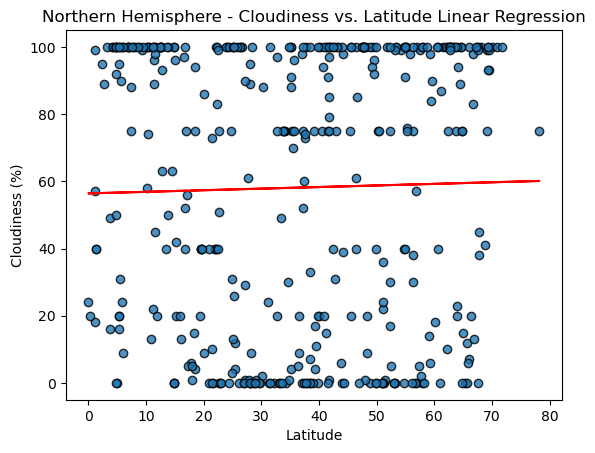

In [25]:
# Northern Hemisphere
# Perform linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set the title and labels
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show the plot
plt.show()

The r-squared is: 0.02319260556382669


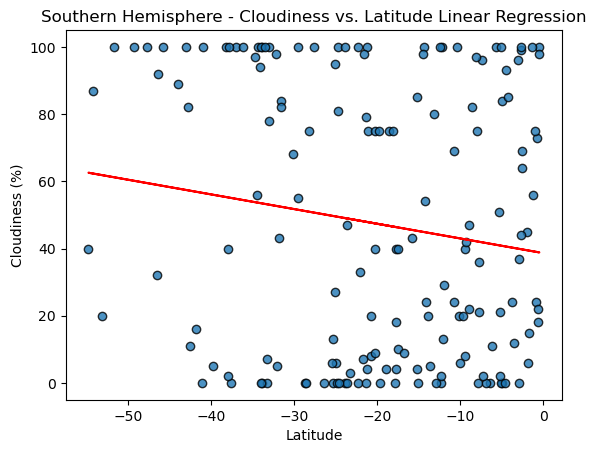

In [26]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression"

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set the title and labels
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** For the northern hemisphere, the regression line has a little slope which indicates a weak correlation between latitude and cloudiness. From this I conclude that cloudiness levels aren't strongly affected by the latitude. In the southern hemisphere, we can see a negative correlation. Less cloudiness as we move towards the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0047309412111023


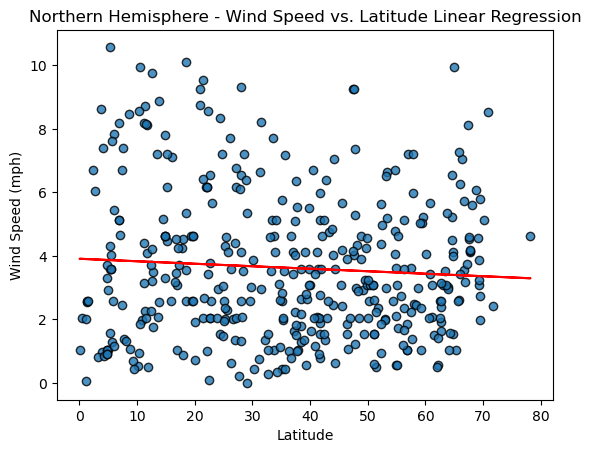

In [27]:
# Northern Hemisphere
# Perform linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
title = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set the title and labels
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show the plot
plt.show()

The r-squared is: 0.032801421910816926


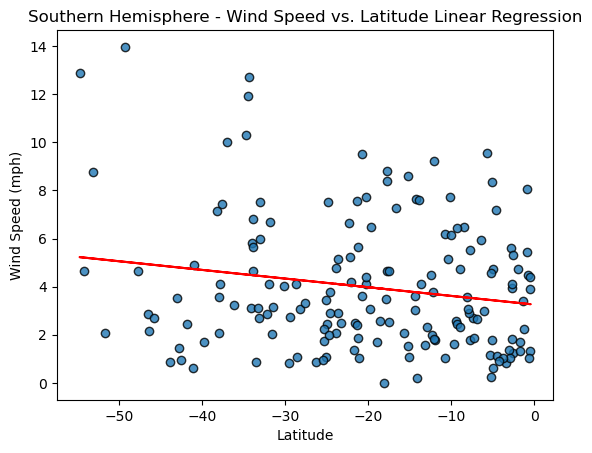

In [28]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
title = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Set the title and labels
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there is a small negative slope, a negative correlation between wind speed and lattitude. In the southern hemisphere, we see a larger than the northern hemisphere negative correlation. As it moves closer to the equator, wind speeds decrease in correlation. 